In [ ]:

%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
import locale

plt.rcParams.update({'font.size': 18})
locale.setlocale(locale.LC_ALL, '')
plt.rcParams['axes.formatter.use_locale'] = True

Tmin = 0
Tmax = 0.02
points = 1000

banque_notes = ["do3","do#3","ré3","ré#3","mi3","fa3","fa#3","sol3","sol#3","la3","la#3","si3","do4","do#4","ré4","ré#4","mi4","fa4","fa#4","sol4","sol#4","la4","la#4","si4"]
banque_fréquences = [262,277,294,311,330,349,370,392,415,440,466,493,523,554,587,622,659,698,740,784,831,880,932,988]


def f(freq):
    #finesse = np.pi*r/(1-r**2)
    #plt.figure(figsize=(13,4))
    #définition de l'intervalle de points de calcul

    x = np.linspace(Tmin, Tmax,points)
    #fig,ax = plt.subplots(figsize=(13,5))
    #fig, axs = plt.subplots(2, 2,figsize=(18,10))
    fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(18,6))
    #calcul et tracé de la proportion en base
    axs[0].plot(x*1000, np.sin(2*np.pi*x*freq) ,color = 'black',linewidth = 2)
    #calcul et tracé de la proportion en acide
    #plt.plot(x, 100/(1+10**(x-pKa)),color = 'blue', label = 'acide')
    xtick_lst = axs[0].get_xticklabels()
    for k in xtick_lst :
      k.set_text(k.get_text().replace(","," ").replace(".",","))
    axs[0].set_xticklabels(xtick_lst)
    #mise en forme du graphique
    #plt.ylim(-0.05*100, 1.05*100)
    axs[0].set_ylabel("Amplitude (V)")
    axs[0].set_xlabel("Temps (ms)")
    #axs[0, 0].set_title("Enregistrement d'une onde sonore de fréquence f = {} Hz".format(round(freq,1)))
    axs[0].set_title("Enregistrement")

    factorfft = 100
    xfft = np.linspace(Tmin, factorfft*Tmax,factorfft*points)
    tx  = np.fft.fft(np.sin(2*np.pi*xfft*freq));
    freqplot = np.fft.fftfreq(xfft.shape[-1],d=(Tmax-Tmin)/points)

    freqmax = 1000*1.1
    tokeep = [i>0 and i<freqmax for i in freqplot]
    freqplot = [freqplot[i] for i in range(len(freqplot)) if tokeep[i]]
    tx = [tx[i] for i in range(len(tx)) if tokeep[i]]
    axs[1].plot(freqplot, tx ,color = 'black',linewidth = 2)
    axs[1].set_ylabel("Amplitude (V)")
    axs[1].set_xlabel("Fréquence (Hz)")
    #axs[0, 0].set_title("Enregistrement d'une onde sonore de fréquence f = {} Hz".format(round(freq,1)))
    axs[1].set_title("Spectre")
    #itx = np.fft.ifft(tx);


    #plt.legend()
    plt.show()

#actualisation de la barre d'actualisation dynamique
interactive_plot = interactive(f, freq=(100, 1000,100))
output = interactive_plot.children[-1]
output.layout.height = '700px'
interactive_plot

interactive(children=(IntSlider(value=500, description='freq', max=1000, min=100, step=100), Output(layout=Lay…

In [ ]:
from ipywidgets import Button
b3 = Button(description='do\#3', style=dict(font_style='italic',font_weight='bold',font_variant="small-caps",text_color='black',text_decoration='underline'))
b3



Button(description='do\\#3', style=ButtonStyle(font_weight='bold'))

In [ ]:
from ipywidgets import *
#mylist = banque_notes
banque_notes = ["do3","do#3","ré3","ré#3","mi3","fa3","fa#3","sol3","sol#3","la3","la#3","si3","do4","do#4","ré4","ré#4","mi4","fa4","fa#4","sol4","sol#4","la4","la#4","si4"]
banque_fréquences = [262,277,294,311,330,349,370,392,415,440,466,493,523,554,587,622,659,698,740,784,831,880,932,988]




def on_button_clicked(b):
    #with out:
    print(b.description)
    #print("Button clicked.")

list_btns=[]
for i,word in enumerate(banque_notes):

    wordwidth= max(len(word) * 12, 40)
    wordwidth = 55
    wordwidth = str(wordwidth) + 'px'
    wd_raw_save_button = widgets.Button(description=word,
                                        disabled=False,
                                        button_style='success',
                                        tooltip='check the word',
                                        icon='',
                                        layout = Layout(width = wordwidth, margin='0px 10px 0px 0px')
                                       )

    list_btns.append(wd_raw_save_button)

    wd_raw_save_button.on_click(on_button_clicked, False)






plt.rcParams.update({'font.size': 18})

Tmin = 0
Tmax = 0.1
points = 1000

freqdo = 32.7


def f(harm1,harm2,harm3,harm4,harm5):

    x = np.linspace(Tmin, Tmax,points)

    fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(18,6))

    sum = sumsign(x)
    axs[0].plot(x*1000, sum ,color = 'black',linewidth = 2)



    #mise en forme du graphique

    axs[0].set_ylabel("Amplitude (V)")
    axs[0].set_xlabel("Temps (ms)")
    axs[0].set_title("Enregistrement")

    """
    factorfft = 100
    xfft = np.linspace(Tmin, factorfft*Tmax,factorfft*points)
    tx  = np.fft.fft(sumsign(xfft));
    freqplot = np.fft.fftfreq(xfft.shape[-1],d=(Tmax-Tmin)/points)
    tx = np.abs(tx)"""

    #/freqplot #normalisation en domaine fréquentiel, pour que des signaux de même amplitude aient la meme TF
    """freqmax = 5*freqdo*1.1
    tokeep = [i>0 and i<freqmax for i in freqplot]
    freqplot = [freqplot[i] for i in range(len(freqplot)) if tokeep[i]]
    tx = [tx[i]/100 for i in range(len(tx)) if tokeep[i]]
    axs[1].plot(freqplot, tx ,color = 'black',linewidth = 2)"""

    """axs[1].set_ylabel("Amplitude (V)")
    axs[1].set_xlabel("Fréquence (Hz)")
    axs[1].set_title("Spectre")"""

    showcase=HBox(list_btns, layout= Layout(width='200%'))
    output = widgets.Output()
    showcase

    plt.show()

#actualisation de la barre d'actualisation dynamique
interactive_plot = interactive(f, harm1=(-5, 5,1),harm2=(-4, 4,1),harm3=(-3, 3,1),harm4=(-3, 3,1),harm5=(-3, 3,1))
output = interactive_plot.children[-1]
output.layout.height = '50px'
interactive_plot

#output = widgets.Output()

#print(output)

Button(button_style='success', description='do#3', layout=Layout(margin='0px 10px 0px 0px', width='55px'), style=ButtonStyle(), tooltip='check the word')
Button clicked.


In [ ]:
list_btns[0].description

'do3'

In [ ]:
#len(mylist[1])
print(widgets.Button.on_click.__doc__)

Register a callback to execute when the button is clicked.

        The callback will be called with one argument, the clicked button
        widget instance.

        Parameters
        ----------
        remove: bool (optional)
            Set to true to remove the callback from the list of callbacks.
        


In [15]:
pip install ipympl

interactive(children=(IntSlider(value=1, description='w', max=10), FloatSlider(value=1.0, description='amp', m…

'output = graph_plot.children[-1]\ngraph_plot'

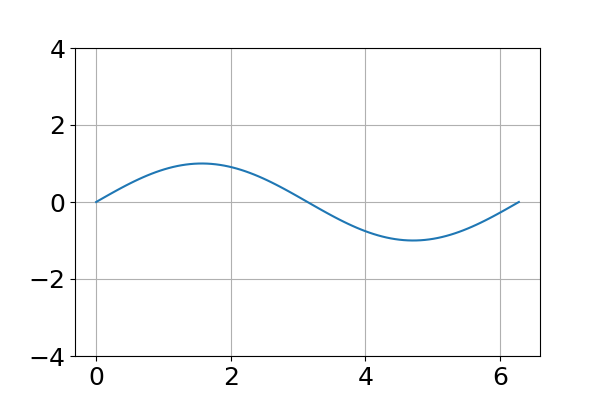

In [18]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

# set up plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_ylim([-4, 4])
ax.grid(True)

# generate x values
x = np.linspace(0, 2 * np.pi, 100)


def my_sine(x, w, amp, phi):
    """
    Return a sine for x with angular frequeny w and amplitude amp.
    """
    return amp*np.sin(w * (x-phi))


#@widgets.
@widgets.interact(w=(0, 10, 1), amp=(0, 4, .1), phi=(0, 2*np.pi+0.01, 0.01))
def update(w = 1.0, amp=1, phi=0):
    """Remove old lines from plot and plot new one"""
    [l.remove() for l in ax.lines]
    ax.plot(x, my_sine(x, w, amp, phi), color='C0')
    plt.plot()
"""output = graph_plot.children[-1]
graph_plot"""

In [17]:
def say_my_name(name):
    """
    Print the current widget value in short sentence
    """
    print(f'My name is {name}')

widgets.interact(say_my_name, name=["Jim", "Emma", "Bond"]);

interactive(children=(Dropdown(description='name', options=('Jim', 'Emma', 'Bond'), value='Jim'), Output()), _…